# Bike Share Analysis in Python
I learned a lot working on the bike share case study for my Google Data Analytics certificate. I got to apply the skills I learned from the course and experienced first hand how data can impact decisions. Working on the project allowed me to develop a strong foundation with R including how to wrangle, clean, and visualize data. 
I know that Python is another programming language used to analyze data and I want to redo the same project to demonstrate my ability with Python as well as to have a better understanding of the differences between R and Python. 

## Background
A little background on the scenario and data:

Cyclistic is a bike-share company in Chicago with a fleet of 5,824 geotracked bicycles and a network of 692 stations. They offer 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders and customers who purchase annual memberships are referred to as Cyclistic members. The company determined that annual members are more profitable than casual riders and is aiming to create a marketing campaign to maximize the number of annual members by converting casual riders.

**Key stakeholder**: Lily Moreno, the director of marketing responsible for developing campaigns to promote bike-share program.

**Business task**: How do annual members and casual riders use Cyclistic bikes differently?

In [1]:
# Setup envionment and import libraries
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
import glob
from pandas.api.types import CategoricalDtype

# Full output for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Data
Proxy data from a similar bike sharing company called Divvy was used. The data can be downloaded at <a href="https://divvy-tripdata.s3.amazonaws.com/index.html" target="_blank">https://divvy-tripdata.s3.amazonaws.com/index.html</a>
12 months of data (12 CSV files) were downloaded and merged into one dataframe.
The dataframe was previewed to confirm merge was sucessful and to examine column headers and data types. 

* There are 13 rows and 5860776 rows
* 4 float64 and 4 object data types

In [26]:
# Read and merge CSV files to dataframe
df = pd.concat(map(pd.read_csv, glob.glob("data/*.csv")))
# Preview data
df
df.info()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.790000,-87.590000,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.800000,-87.600000,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.780000,-87.580000,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.79,-87.59,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634853,8891BA0053ECEC4F,electric_bike,2022-05-27 22:00:02,2022-05-27 22:07:01,Clark St & Newport St,632,NaN,NaN,41.944557,-87.654830,41.92,-87.65,member
634854,47D8B5FBCADECFC1,electric_bike,2022-05-15 16:05:39,2022-05-15 16:44:12,Clark St & Newport St,632,NaN,NaN,41.944479,-87.654758,41.92,-87.76,member
634855,AA8D16CF38B40703,electric_bike,2022-05-21 10:10:13,2022-05-21 10:26:09,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,41.910000,-87.700000,41.92,-87.66,casual
634856,897EBFD44F329E0A,electric_bike,2022-05-12 07:53:58,2022-05-12 08:01:18,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,41.910000,-87.700000,41.90,-87.69,member


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 626.0+ MB


## Prepare Data
`started_at` and `ended_at` columns were converted to datetime format to allow for easy creation of year, month, day, and day of the week columns. `day_of_week` was converted to a categorical data type to maintain the order of the days of the week. To determine the ride length, `start_at` was subtracted from `ended_at` which created a timedelta object. This was converted to seconds (a float data type) to allow for comparison integers later and creation of plots.

In [27]:
# Convert started_at and ended_at columns to DateTime format
df['started_at'] = pd.to_datetime(df['started_at'], format = '%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format = '%Y-%m-%d %H:%M:%S')

# Add columns for year, month, day, and day of the week 
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month_name()
df['day'] = df['started_at'].dt.day
df['day_of_week'] = df['started_at'].dt.day_name()

# Order days of the week
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories = cats, ordered = True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)
# Order months
cats2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat2_type = CategoricalDtype(categories = cats2, ordered = True)
df['month'] = df['month'].astype(cat2_type)

# Add column for ride length
df['ride_length'] = df['ended_at'] - df['started_at']
# Convert DateTime format to seconds
df['ride_length'] = df['ride_length'].dt.total_seconds()

## Clean Data
The data was examined to confirm each row is unique (no duplicates) and within the specified date range. Values in the `member_casual` and `rideable_type` columns were evaluated to make sure there was nothing unexpected and `ride_length` was checked for negative values. 

Rows with missing values were dropped along with rows containing `docked_bike` and negative ride lengths. The latitude/longitude and station columns were dropped because they will not be used later. There are two 2 ways to drop rows or columns in a dataframe. One way is to use the `drop()` function or the faster way, which is to assign a filtered version of the dataframe to itself. 

In [12]:
# Check for duplicate rows
df_dupes = df[df.duplicated(['ride_id'])]
print(df_dupes)
# Check data is within date range
df['started_at'].max()
df['started_at'].min()
# Check for inconsistent data (i.e. more than 2 member types)
df['member_casual'].value_counts()
df['rideable_type'].value_counts()
# Check for negative ride durations
negative_ride_length = df[(df['ride_length'] < 0)]
print(negative_ride_length)

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, year, month, day, day_of_week, ride_length]
Index: []


Timestamp('2022-05-31 23:59:56')

Timestamp('2021-06-01 00:00:38')

member    3300919
casual    2559857
Name: member_casual, dtype: int64

classic_bike     3217737
electric_bike    2368592
docked_bike       274447
Name: rideable_type, dtype: int64

                 ride_id  rideable_type          started_at  \
15342   732D84DAD2CC9B73   classic_bike 2021-06-20 10:52:26   
69360   A18D39992AA99793   classic_bike 2021-06-15 20:58:03   
249369  126E4DA0FA0A3E11  electric_bike 2021-06-02 17:52:32   
571909  24C4FC421D642C22   classic_bike 2021-06-28 13:18:26   
728861  4E88151C0FBCA967   classic_bike 2021-06-28 14:56:28   
...                  ...            ...                 ...   
358579  F4E4485BFB33D916  electric_bike 2021-11-07 01:57:53   
359949  B506DCD44974C575  electric_bike 2021-11-07 01:53:34   
184212  2D97E3C98E165D80   classic_bike 2022-03-05 11:00:57   
187389  7407049C5D89A13D  electric_bike 2022-03-05 11:38:04   
592385  0793C9208A64302A  electric_bike 2022-05-30 11:06:29   

                  ended_at                      start_station_name  \
15342  2021-06-20 10:52:25                    Clinton St & Polk St   
69360  2021-06-15 20:54:51                  Broadway & Sheridan Rd   
249369 2021-06-02 17:47:26       

In [30]:
# Remove irrelevant columns and missing rows
df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis = 1, inplace = True)
df.dropna(inplace = True)

# Drop rows with docked_bike or negative ride length
df = df[(df['rideable_type'] != 'docked_bike') & (df['ride_length'] > 0)]

## Analyze Data
The data was summarized to look at the count, mean, median, max, and min. 
4 plots were created to compare average ride length and number of rides with days of the week and month.

In [38]:
# Summary of data
df['ride_length'].describe()
# Group by day of week and member type, then aggregate average ride length
df1 = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean()
print(df1)

count    5.585690e+06
mean     1.057460e+03
std      2.672579e+03
min      1.000000e+00
25%      3.720000e+02
50%      6.550000e+02
75%      1.170000e+03
max      9.359600e+04
Name: ride_length, dtype: float64

day_of_week  member_casual
Sunday       casual           1660.616250
             member            887.714301
Monday       casual           1463.233746
             member            758.758714
Tuesday      casual           1295.504703
             member            736.766655
Wednesday    casual           1279.173547
             member            738.605595
Thursday     casual           1310.325018
             member            746.612016
Friday       casual           1372.187195
             member            766.992807
Saturday     casual           1594.105067
             member            877.462751
Name: ride_length, dtype: float64


<Figure size 1080x1008 with 0 Axes>

<AxesSubplot:xlabel='day_of_week', ylabel='ride_length'>

Text(0.5, 1.0, 'Average Ride Length vs. Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Average Ride Length (seconds)')

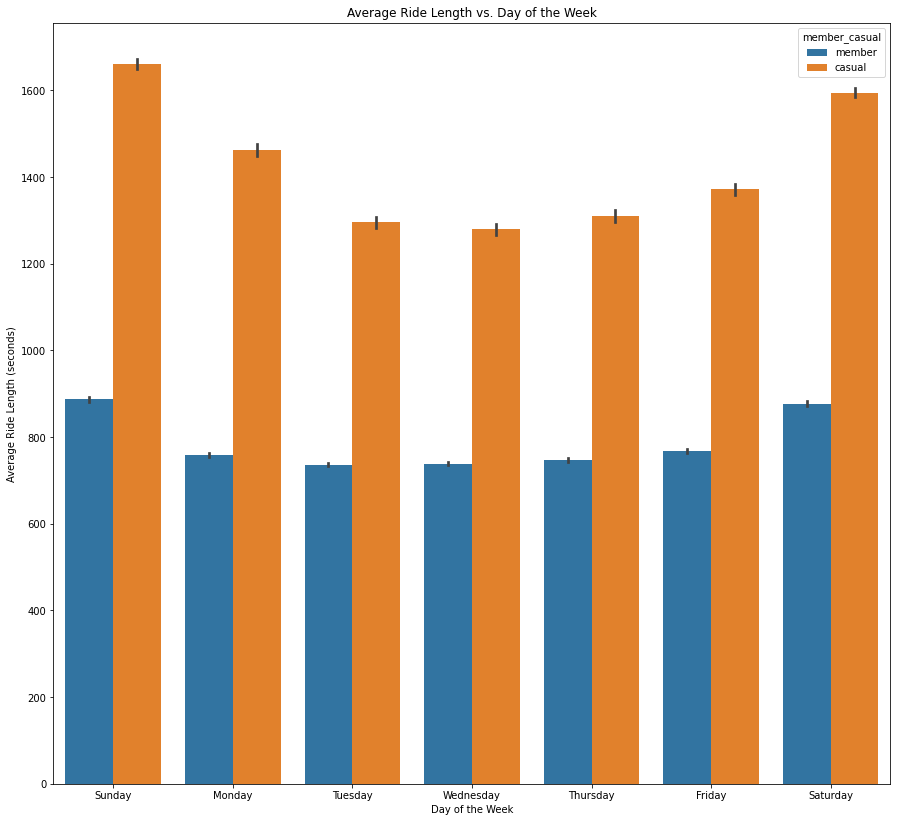

In [18]:
# Plot average ride length vs. day of the week
plt.figure(figsize=[15, 14])
sns.barplot(data = df, x = 'day_of_week', y = 'ride_length', hue = 'member_casual')
plt.title('Average Ride Length vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (seconds)')

<Figure size 1080x1008 with 0 Axes>

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

Text(0.5, 1.0, 'Number of Rides vs. Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Rides')

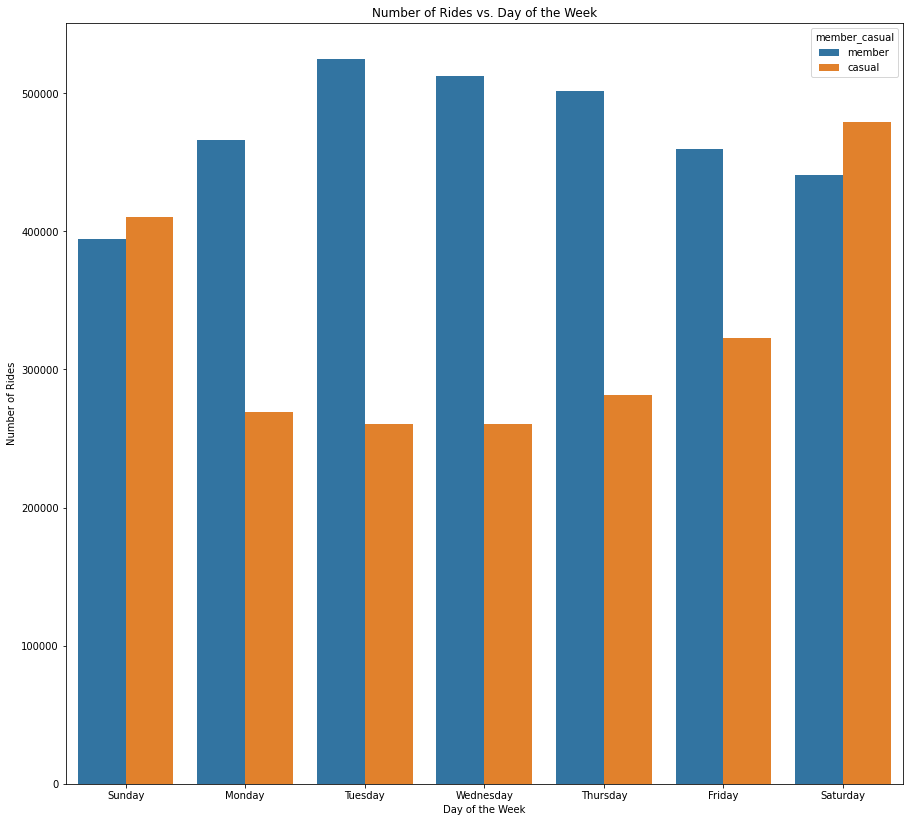

In [33]:
# Plot number of rides vs. day of the week
plt.figure(figsize=[15, 14])
sns.countplot(data = df, x = 'day_of_week', hue = 'member_casual')
plt.title('Number of Rides vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')

<Figure size 1080x1008 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='ride_length'>

Text(0.5, 1.0, 'Average Ride Length vs. Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Average Ride Length (seconds)')

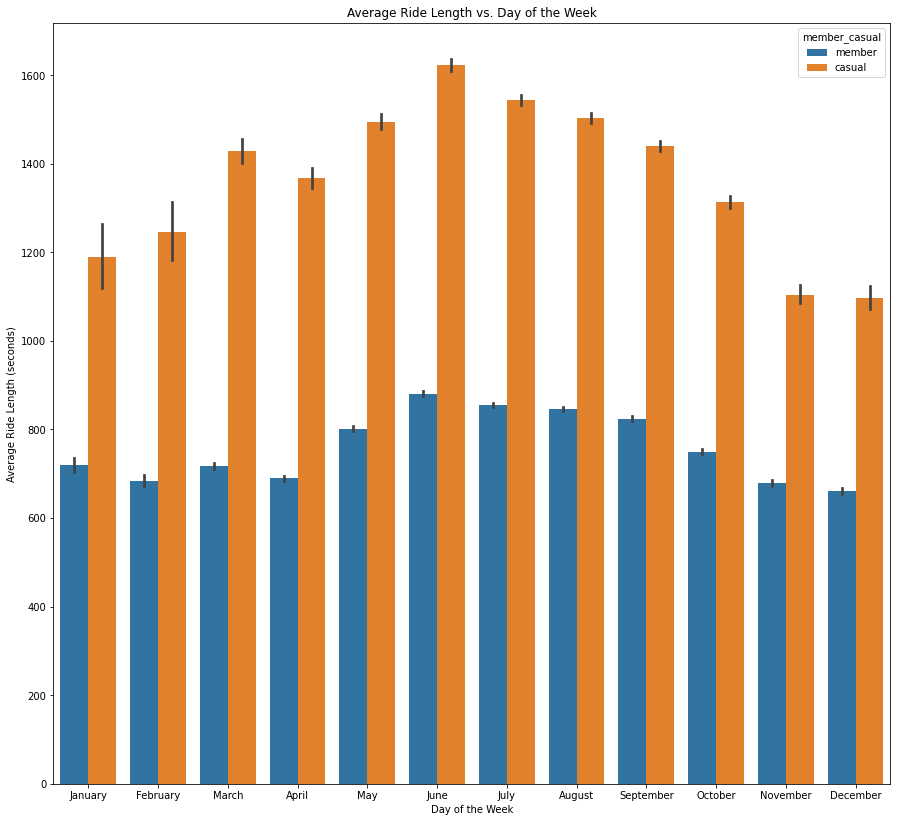

In [36]:
# Plot average ride length vs. month
plt.figure(figsize=[15, 14])
sns.barplot(data = df, x = 'month', y = 'ride_length', hue = 'member_casual')
plt.title('Average Ride Length vs. Month')
plt.xlabel('Month')
plt.ylabel('Average Ride Length (seconds)')

<Figure size 1080x1008 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='count'>

Text(0.5, 1.0, 'Number of Rides vs. Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Rides')

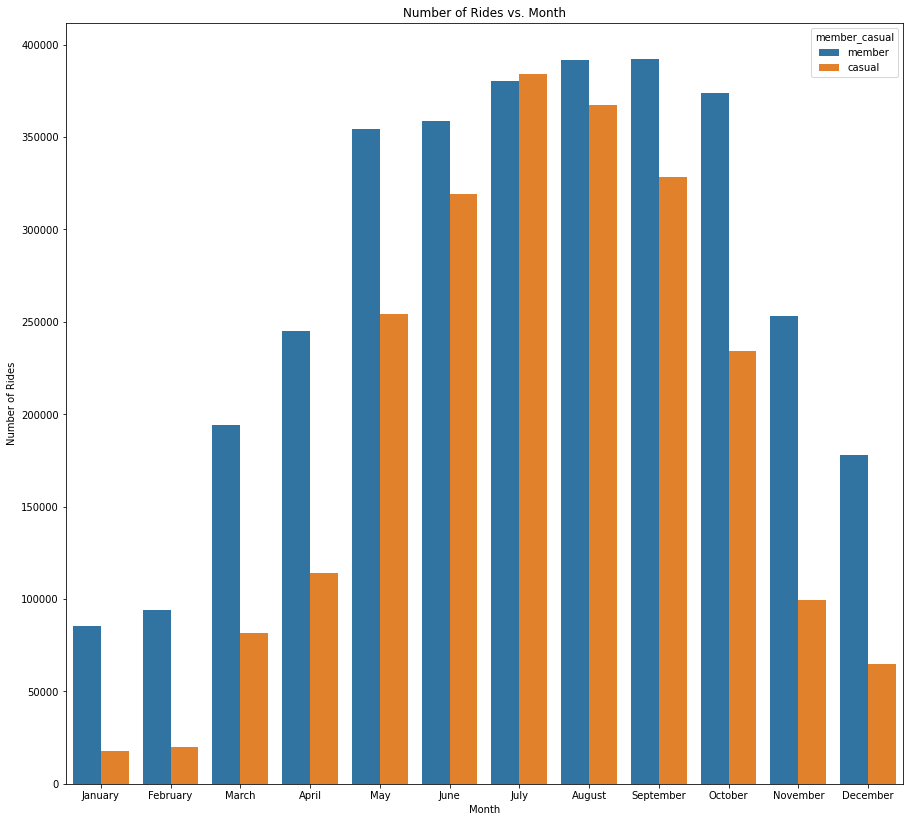

In [37]:
# Plot number of rides vs. month
plt.figure(figsize=[15, 14])
sns.countplot(data = df, x = 'month', hue = 'member_casual')
plt.title('Number of Rides vs. Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

## Interpret Data
Insights from data:
* The average ride duration was significant longer (almost double) for casual riders compared to annual members.
* The number of rides was overall higher for annual members compared to casual riders.
* The number of rides was significantly higher for casual riders on the weekend.
* The number of rides for both annual members and casual riders were higher during the months of Spring and Summer.

***
R and Python are 2 programming languages used to analyze data. R is primarily used by scientists and researchers for statistical analysis and visualization of data, whereas Python is multipurpose and used by programmers and developers to create games or software, in addition to analyzing data. 
After completing the bike share project twice in R and Python, I think I developed preference for Python. The first thing I noticed was how much faster Python was compared to R. I used the same computer, the same data, the same functions to load and merge the data, and noticed that Python executed the code much faster than R. I also prefer the Python syntax which is simple and easier to follow. 
While working on both projects, I did a lot of research to troubleshoot issues and learn how to use packages and functions. I found it was a lot easier to find resources for Python compared to R. 
I’m sure there is a lot I still don’t know about Python and R, but if they both have the capability to carry out the functions to analyze and visualize data, I would choose Python. 
